In [1]:
import pandas as pd

# Loading datasets
# Kenya GDP dataset
kenya_gdp = pd.read_csv('kenya-gdp-gross-domestic-product.csv')

# Kenya tourism statistics dataset
kenya_tourism = pd.read_csv('kenya-tourism-statistics.csv')

# Wildlife data
wildlife_data = pd.read_csv('Wildlife_data.csv')

# Climate data
climate_data = pd.read_csv('climate_data.csv')

# Displaying a few rows of each dataset to understand the structure
print("Kenya GDP dataset:")
print(kenya_gdp.head())

print("\nKenya tourism statistics dataset:")
print(kenya_tourism.head())

print("\nWildlife data:")
print(wildlife_data.head())

print("\nClimate data:")
print(climate_data.head())

Kenya GDP dataset:
         year   GDP ( Billions of US $)   Per Capita (US $)   Annual % Change
0  12/31/1995                  9.046320            336.5653            4.4062
1  12/31/1996                 12.045865            436.1957            4.1468
2  12/31/1997                 13.115764            462.4045            0.4749
3  12/31/1998                 14.093999            483.7086            3.2902
4  12/31/1999                 12.896011            430.3673            2.3054

Kenya tourism statistics dataset:
         year   Spending ($)   % of Exports    
0  12/31/1995      785000000        22.2648 NaN
1  12/31/1996      823000000        22.4731 NaN
2  12/31/1997     1077000000        25.8921 NaN
3  12/31/1998     1213000000        27.7575 NaN
4  12/31/1999     1211000000        28.2460 NaN

Wildlife data:
              name  population
0  Nubian Giraffes         768
1             Lion        2589
2         Cheetahs        1160
3        Elephants       36280
4    Grevy's Zebra 

In [2]:
print("Kenya GDP columns:")
print(kenya_gdp.columns)

print("\nKenya tourism statistics columns:")
print(kenya_tourism.columns)

print("\nWildlife data columns:")
print(wildlife_data.columns)

print("\nClimate data columns:")
print(climate_data.columns)

Kenya GDP columns:
Index(['year', ' GDP ( Billions of US $)', ' Per Capita (US $)',
       ' Annual % Change'],
      dtype='object')

Kenya tourism statistics columns:
Index(['year', ' Spending ($)', ' % of Exports', ' '], dtype='object')

Wildlife data columns:
Index(['name', 'population'], dtype='object')

Climate data columns:
Index(['year', 'pr_cmcc-esm2', 'pr_nesm3', 'tas_cmcc-esm2',
       'tas_mpi-esm1-2-hr', 'tas_nesm3'],
      dtype='object')


In [4]:
# Merge Kenya GDP and climate datasets on 'year'
merged_data = pd.merge(kenya_gdp, climate_data, on='year', how='outer')

# Merge merged_data with Kenya tourism statistics dataset on 'date'
merged_data = pd.merge(merged_data, kenya_tourism, on='year', how='outer')

print(merged_data.head())
print(merged_data.info())

         year   GDP ( Billions of US $)   Per Capita (US $)   Annual % Change  \
0  12/31/1995                  9.046320            336.5653            4.4062   
1  12/31/1996                 12.045865            436.1957            4.1468   
2  12/31/1997                 13.115764            462.4045            0.4749   
3  12/31/1998                 14.093999            483.7086            3.2902   
4  12/31/1999                 12.896011            430.3673            2.3054   

   pr_cmcc-esm2  pr_nesm3  tas_cmcc-esm2  tas_mpi-esm1-2-hr  tas_nesm3  \
0           NaN       NaN            NaN                NaN        NaN   
1           NaN       NaN            NaN                NaN        NaN   
2           NaN       NaN            NaN                NaN        NaN   
3           NaN       NaN            NaN                NaN        NaN   
4           NaN       NaN            NaN                NaN        NaN   

    Spending ($)   % of Exports      
0   7.850000e+08        22.264

In [5]:
print(merged_data.describe())

# Missing Values
print(merged_data.isnull().sum())

# Correlation Analysis
correlation = merged_data.corr()
print(correlation)

        GDP ( Billions of US $)   Per Capita (US $)   Annual % Change  \
count                 25.000000           25.000000         25.000000   
mean                  39.359337          928.083244          4.028136   
std                   28.771339          527.492845          2.025994   
min                    9.046320          336.565300          0.232300   
25%                   13.147737          441.391400          3.290200   
50%                   31.958195          840.191600          4.213500   
75%                   61.671440         1376.829200          5.114200   
max                  100.378436         1970.080100          8.058500   

       pr_cmcc-esm2    pr_nesm3  tas_cmcc-esm2  tas_mpi-esm1-2-hr  tas_nesm3  \
count     65.000000   65.000000      65.000000          65.000000  65.000000   
mean     730.718000  715.748154      25.146154          25.137231  25.220154   
std      100.795837   88.448867       0.430442           0.410524   0.363643   
min      540.020000  4

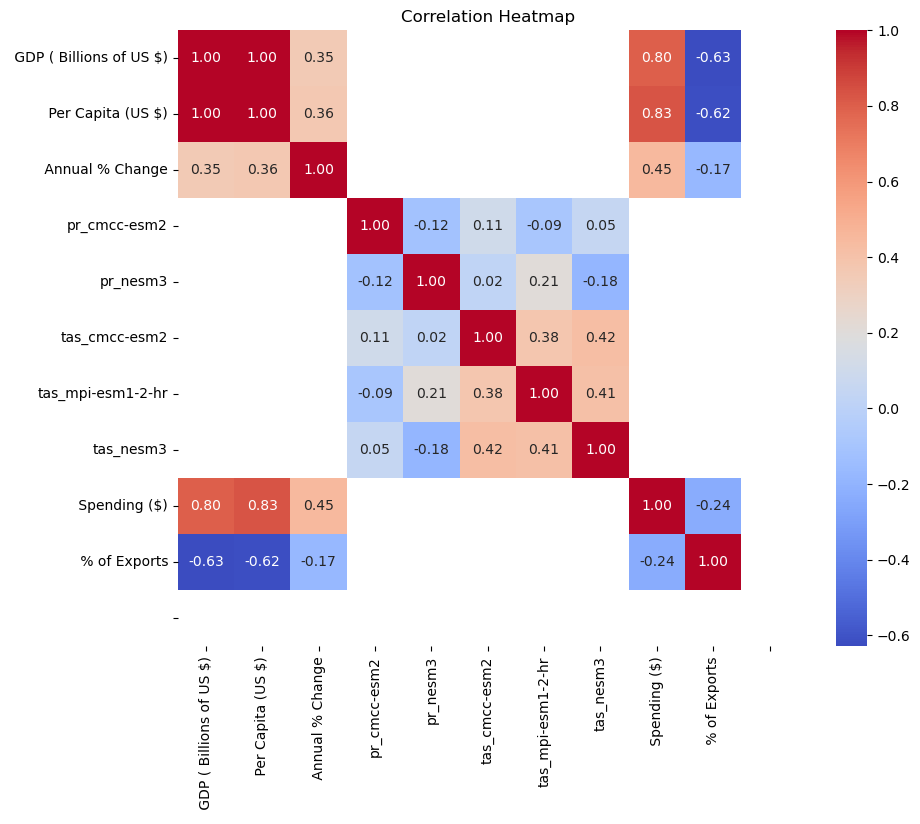

In [8]:
# Visualizations (Example - replace with your specific visualizations)
import matplotlib.pyplot as plt
import seaborn as sns

#Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

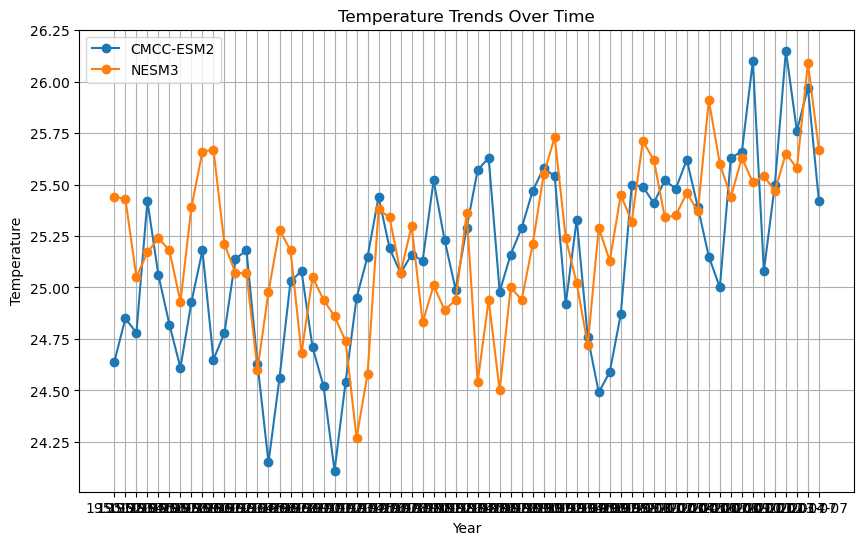

In [9]:
#climate trends over the years (Temperature)
plt.figure(figsize=(10, 6))
plt.plot(climate_data['year'], climate_data['tas_cmcc-esm2'], label='CMCC-ESM2', marker='o')
plt.plot(climate_data['year'], climate_data['tas_nesm3'], label='NESM3', marker='o')
plt.title('Temperature Trends Over Time')
plt.xlabel('Year')
plt.ylabel('Temperature')
plt.legend()
plt.grid(True)
plt.show()

In [11]:
print(merged_data.columns)

Index(['year', ' GDP ( Billions of US $)', ' Per Capita (US $)',
       ' Annual % Change', 'pr_cmcc-esm2', 'pr_nesm3', 'tas_cmcc-esm2',
       'tas_mpi-esm1-2-hr', 'tas_nesm3', ' Spending ($)', ' % of Exports',
       ' '],
      dtype='object')


In [12]:
# Removing extra spaces from column names
merged_data.columns = merged_data.columns.str.strip()

# Updated column names
print(merged_data.columns)

# Selecting features and target variable
features = ['pr_cmcc-esm2', 'pr_nesm3', 'tas_cmcc-esm2', 'tas_mpi-esm1-2-hr', 'tas_nesm3', 'Spending ($)', '% of Exports']
target = 'GDP ( Billions of US $)'

# Handling missing values (fillna with mean or appropriate strategy)
merged_data.fillna(merged_data.mean(), inplace=True)

# Splitting data into training and testing sets
X = merged_data[features]
y = merged_data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
predictions = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

Index(['year', 'GDP ( Billions of US $)', 'Per Capita (US $)',
       'Annual % Change', 'pr_cmcc-esm2', 'pr_nesm3', 'tas_cmcc-esm2',
       'tas_mpi-esm1-2-hr', 'tas_nesm3', 'Spending ($)', '% of Exports', ''],
      dtype='object')


C:\Users\kiman\AppData\Local\Temp\ipykernel_2420\431937872.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  merged_data.fillna(merged_data.mean(), inplace=True)


Mean Squared Error: 34.735499183386395
R-squared Score: 0.857789607980565


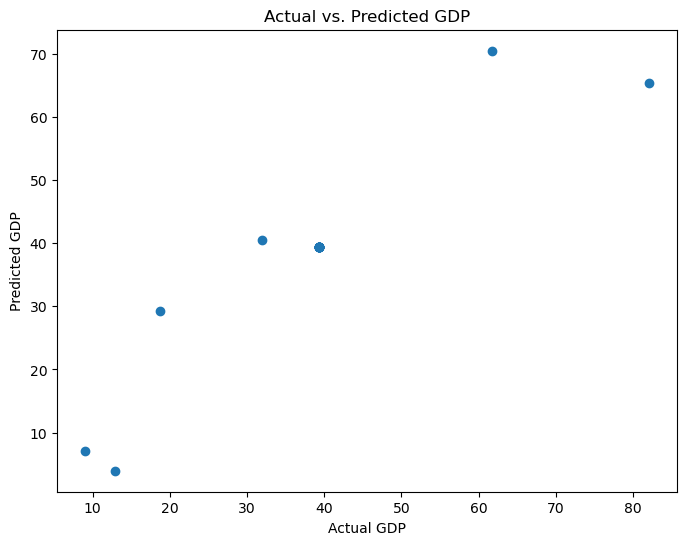

In [13]:
# Example visualization of predicted vs. actual values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions)
plt.xlabel('Actual GDP')
plt.ylabel('Predicted GDP')
plt.title('Actual vs. Predicted GDP')
plt.show()

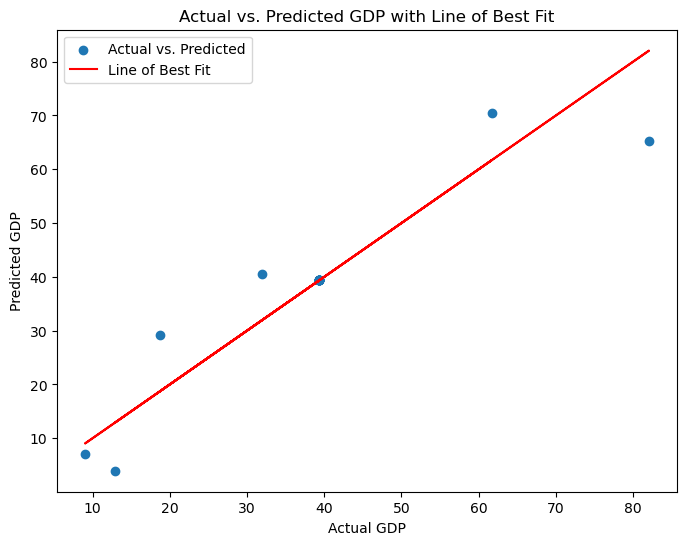

In [15]:
# Plotting the line of best fit
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, label='Actual vs. Predicted')
plt.plot(y_test, y_test, color='red', label='Line of Best Fit')  # Plotting the diagonal line
plt.xlabel('Actual GDP')
plt.ylabel('Predicted GDP')
plt.title('Actual vs. Predicted GDP with Line of Best Fit')
plt.legend()
plt.show()